In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\UET\ThaiDuy\results.csv")
df.info

<bound method DataFrame.info of                 Player   Nation    Pos           Squad   Age  Playing_Time_MP  \
0      Aaron Cresswell  eng ENG  DF,FW        West Ham  33.0               11   
1       Aaron Ramsdale  eng ENG     GK         Arsenal  25.0                6   
2    Aaron Wan-Bissaka  eng ENG     DF  Manchester Utd  25.0               22   
3         Aaron Hickey  sct SCO     DF       Brentford  21.0                9   
4         Aaron Ramsey  eng ENG  MF,FW         Burnley  20.0               14   
..                 ...      ...    ...             ...   ...              ...   
488      Yves Bissouma   ml MLI     MF       Tottenham  26.0               28   
489       Zeki Amdouni   ch SUI     FW         Burnley  22.0               34   
490        Álex Moreno   es ESP     DF     Aston Villa  30.0               21   
491     Đorđe Petrović   rs SRB     GK         Chelsea  23.0               23   
492   Łukasz Fabiański   pl POL     GK        West Ham  38.0               10

In [3]:
# top 3 cầu thủ cao nhất ở mỗi chỉ số
top3 = {}

for col in df.select_dtypes(include='number').columns:
    top_3_highest = df.nlargest(3, col)[['Player', col]]
    top_3_lowest = df.nsmallest(3, col)[['Player', col]]
    
    top3[col] = {
        'Top 3 Highest': top_3_highest,
        'Top 3 Lowest': top_3_lowest
    }

with open('result2_1.txt', 'w') as f:
    for stat, values in top3.items():
        f.write(f"Chỉ số: {stat}\n")
        f.write("Top 3 cầu thủ có điểm cao nhất:\n")
        f.write(values['Top 3 Highest'].to_string(index=False) + "\n\n")
        f.write("Top 3 cầu thủ có điểm thấp nhất:\n")
        f.write(values['Top 3 Lowest'].to_string(index=False) + "\n\n")
        f.write("-" * 50 + "\n\n")

In [4]:
# trung vị của mỗi chỉ số, trung bình và độ lệch chuẩn của mỗi chỉ số cho các cầu thủ trong toàn giải và của mỗi đội
numeric_columns = df.select_dtypes(include='number').columns

result_df = pd.DataFrame()

all_stats = {
    'Team': 'all'
}
for col in numeric_columns:
    all_stats[f'Median of {col}'] = df[col].median()
    all_stats[f'Mean of {col}'] = df[col].mean()
    all_stats[f'Std of {col}'] = df[col].std()

result_df = pd.concat([result_df, pd.DataFrame([all_stats])], ignore_index=True)

for team in df['Squad'].unique():
    team_stats = {
        'Team': team
    }
    team_data = df[df['Squad'] == team]
    for col in numeric_columns:
        team_stats[f'Median of {col}'] = team_data[col].median()
        team_stats[f'Mean of {col}'] = team_data[col].mean()
        team_stats[f'Std of {col}'] = team_data[col].std()
    
    result_df = pd.concat([result_df, pd.DataFrame([team_stats])], ignore_index=True)

result_df.to_csv('results2_2.csv', index=False)

In [5]:
def normalize(text):
    return text.replace('/', '_')
    

In [6]:
# # historgram phân bố của mỗi chỉ số của các cầu thủ trong toàn giải và mỗi đội
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# output_dir = 'result2_3'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for col in numeric_columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f'Distribution of {col} - All Players')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.tight_layout()
#     # Lưu hình ảnh
#     name = normalize(col)
#     plt.savefig(os.path.join(output_dir, f'all_players_{name}.png'))
#     plt.close()

# # Vẽ histogram cho từng đội và lưu vào thư mục riêng của đội đó
# for team in df['Squad'].unique():
#     team_data = df[df['Squad'] == team]
    
#     # Tạo thư mục cho đội nếu chưa tồn tại
#     team_dir = os.path.join(output_dir, team)
#     if not os.path.exists(team_dir):
#         os.makedirs(team_dir)
    
#     # Lưu các histogram cho từng chỉ số của đội
#     for col in numeric_columns:
#         plt.figure(figsize=(10, 6))
#         sns.histplot(team_data[col], kde=True, bins=30)
#         plt.title(f'Distribution of {col} - {team}')
#         plt.xlabel(col)
#         plt.ylabel('Frequency')
#         plt.grid(True)
#         plt.tight_layout()
#         # Lưu hình ảnh vào thư mục của đội
#         name = normalize(col)
#         plt.savefig(os.path.join(team_dir, f'{team}_{name}.png'))
#         plt.close()

In [7]:
# Tìm đội bóng có chỉ số điểm số cao nhất ở mỗi chỉ số

best_teams_by_stat = {}
for col in df.columns[5:]:
    max_idx = df[col].idxmax()
    best_team = df.loc[max_idx, 'Squad']
    best_teams_by_stat[col] = best_team

performance_columns = [
    'Performance_W', 'Performance_D', 'Performance_L', 'Performance_CS%',
    'Standard_Gls', 'Per_90_Minutes_Gls', 'Per_90_Minutes_Ast',
    'Per_90_Minutes_G+A', 'Performance_Save%', 'Penalty_Kicks_Save%'
]

df['Total_Performance'] = (
    df['Performance_W'] * 3 +
    df['Performance_D'] * 1 +
    df['Performance_CS%'] * 2 +
    df['Standard_Gls']
)
best_team_overall = df.loc[df['Total_Performance'].idxmax(), 'Squad']

with open("result2_4.txt", "w") as f:
    f.write("Teams with the highest score in each stat:\n")
    for stat, team in best_teams_by_stat.items():
        f.write(f"{stat}: {team}\n")
    f.write("\nTeam with the best overall performance:\n")
    f.write(best_team_overall)

print(best_team_overall)

Arsenal


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Chọn các cột có số liệu liên quan để phân nhóm
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numerical_columns].fillna(-999)  # Thay NaN bằng giá trị -999

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

if np.isnan(data_scaled).sum() == 0:
    kmeans = KMeans(n_clusters=9, random_state=42)
    df['Cluster'] = kmeans.fit_predict(data_scaled)

    # Ghi kết quả vào file .txt
    with open("player_clusters.txt", "w") as f:
        for cluster in range(9):
            f.write(f"Cluster {cluster}:\n")
            cluster_players = df[df['Cluster'] == cluster]['Player'].tolist()
            for player in cluster_players:
                f.write(f"- {player}\n")
            f.write("\n")
else:
    print("Error: Data contains NaN values after scaling.")

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


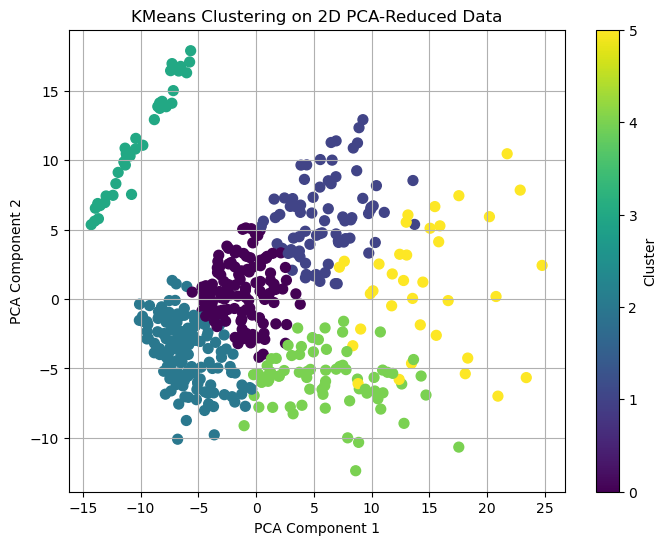

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numerical_columns].fillna(-999)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering on 2D PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

[  21.2   13.  2534. ] [  29.2   20.  2552. ]


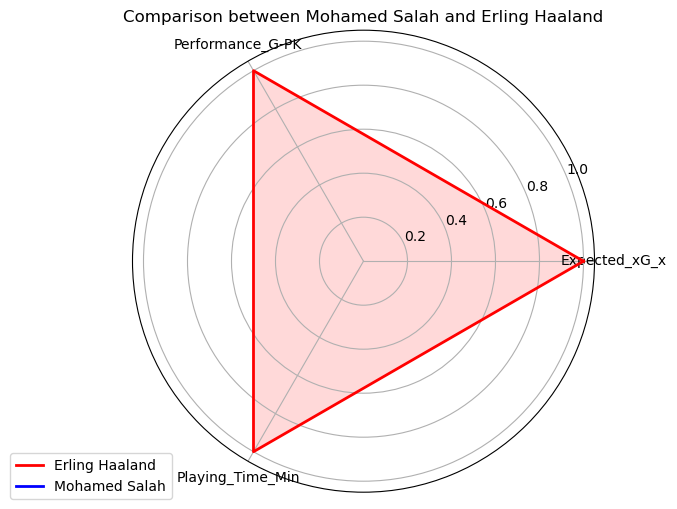

In [43]:
import argparse
from math import pi
from sklearn.preprocessing import MinMaxScaler

def radar_chart(df, player1, player2, attributes):
    # Lấy dữ liệu của hai cầu thủ
    player1_data = df[df['Player'] == player1][attributes].values.flatten()
    player2_data = df[df['Player'] == player2][attributes].values.flatten()
    print(player1_data, player2_data)

    # Chuẩn hóa dữ liệu về khoảng 0-1 để dễ so sánh
    data = np.array([player1_data, player2_data])
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data)
    
    # Dữ liệu chuẩn hóa của 2 cầu thủ
    player1_data = data_normalized[0]
    player2_data = data_normalized[1]

    # Tạo các nhãn cho các chỉ số
    labels = attributes
    num_vars = len(labels)

    # Tạo các góc cho biểu đồ radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Đóng hình tròn cho các góc
    player1_data = np.concatenate((player1_data, [player1_data[0]]))
    player2_data = np.concatenate((player2_data, [player2_data[0]]))
    angles += angles[:1]

    # Thiết lập biểu đồ
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Vẽ radar chart cho cầu thủ 1
    # ax.fill(angles, player1_data, color='blue', alpha=0.15)
    # ax.plot(angles, player1_data, color='blue', linewidth=2, label=player1)

    # Vẽ radar chart cho cầu thủ 2
    ax.fill(angles, player2_data, color='red', alpha=0.15)
    ax.plot(angles, player2_data, color='red', linewidth=2, label=player2)

    ax.fill(angles, player1_data, color='blue', alpha=0.15)
    ax.plot(angles, player1_data, color='blue', linewidth=2, label=player1)

    # Đặt các nhãn cho các trục
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Tinh chỉnh hiển thị
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(f"Comparison between {player1} and {player2}")
    plt.show()

# Chọn cầu thủ và các chỉ số so sánh
player1 = "Mohamed Salah"
player2 = "Erling Haaland"
attributes = ["Expected_xG_x", "Performance_G-PK", "Playing_Time_Min"]
# Player,Nation,Pos,Squad,Age,Playing_Time_MP,Playing_Time_Starts,Playing_Time_Min,Performance_Ast,Performance_G-PK,Performance_PK,Performance_CrdY,Performance_CrdR,Expected_xG_x,Expected_npxG_x,Expected_xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per_90_Minutes_Gls,Per_90_Minutes_Ast,Per_90_Minutes_G+A,Per_90_Minutes_G-PK,Per_90_Minutes_G+A-PK,Per_90_Minutes_xG,Per_90_Minutes_xAG,Per_90_Minutes_xG+xAG,Per_90_Minutes_npxG,Per_90_Minutes_npxG+xAG,Performance_GA,Performance_GA90,Performance_SoTA,Performance_Saves,Performance_Save%,Performance_W,Performance_D,Performance_L,Performance_CS,Performance_CS%,Penalty_Kicks_PKatt,Penalty_Kicks_PKA,Penalty_Kicks_PKsv,Penalty_Kicks_PKm,Penalty_Kicks_Save%,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_xG_y,Expected_npxG_y,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,Expected_xA,Expected_A-xAG,KP,1/3,PPA,CrsPA,PrgP,Pass_Types_Live,Pass_Types_Dead,Pass_Types_FK,Pass_Types_TB,Pass_Types_Sw,Pass_Types_Crs,Pass_Types_TI,Pass_Types_CK,Corner_Kicks_In,Corner_Kicks_Out,Corner_Kicks_Str,Outcomes_Cmp,Outcomes_Off,Outcomes_Blocks,SCA_SCA,SCA_SCA90,SCA_Types_PassLive,SCA_Types_PassDead,SCA_Types_TO,SCA_Types_Sh,SCA_Types_Fld,SCA_Types_Def,GCA_GCA,GCA_GCA90,GCA_Types_PassLive,GCA_Types_PassDead,GCA_Types_TO,GCA_Types_Sh,GCA_Types_Fld,GCA_Types_Def,Tackles_Tkl,Tackles_TklW,Tackles_Def3rd,Tackles_Mid3rd,Tackles_Att3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Touches_Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,Starts_Starts,Starts_Mn/Start,Starts_Compl,Subs_Subs,Subs_Mn/Sub,Subs_unSub,Team_Success_PPM,Team_Success_onG,Team_Success_onGA,Team_Success_(xG)_onxG,Team_Success_(xG)_onxGA,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_OG,Performance_Recov,Aerial_Duels_Won,Aerial_Duels_Lost,Aerial_Duels_Won%


if player1 not in df['Player'].values:
    print(f"Player {player1} not found in the dataset.")
elif player2 not in df['Player'].values:
    print(f"Player {player2} not found in the dataset.")
else:
    # Vẽ biểu đồ radar so sánh hai cầu thủ
    radar_chart(df, player1, player2, attributes)